# Data Visualization Practical — Session 2


**What you'll learn today**
- Load a public dataset into pandas
- Clean & prepare data minimally (select, filter, group, handle missing **missingno**)
- How to handle missing data
- Choose appropriate chart types (line, bar, histogram, scatter, box/violin)
- Create and style charts with **Matplotlib**, **Seaborn** and **Plotly Express**
- Storytelling Communicate an insight with a clear title, labels, and annotations

---
### Setup
Lets explore different datasets

**Datasets:**
1. **CO₂ Emissions** (Our World in Data):
   - URL: `https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv`
   - Rich time series by country; great for line charts, per-capita comparisons.
2. **World Bank Indicators** (gapminder-like small sample):
   - URL: `https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv`
   - Good for scatter (life expectancy vs GDP) and animated trends.

# Install libraries

In [1]:
!pip install pandas numpy matplotlib plotly

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://pypi.tuna.tsinghua.edu.cn/simple/


### Load Our World in Data — CO₂

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', 50)
co2_url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
co2 = pd.read_csv(co2_url)
co2.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,...,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
co2

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,...,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50402,Zimbabwe,2020,ZWE,15526887.0,2.317871e+10,0.496,0.032,8.491,-1.776,-17.298,7.897,-8.699,-52.416,0.509,0.341,0.235,0.547,0.366,0.253,4.932,0.318,10.482,0.675,0.452,20.005,...,0.020,0.035,0.046,0.046,0.112,0.078,0.0,NaN,0.245,0.025,NaN,0.0,NaN,-0.013,0.028,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,1.991,23.450
50403,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.542,0.034,10.223,1.732,20.398,12.444,4.547,57.572,0.788,0.495,0.331,0.647,0.407,0.272,5.936,0.376,12.359,0.782,0.492,20.548,...,0.030,0.040,0.046,0.046,0.110,0.077,0.0,NaN,0.244,0.025,NaN,0.0,NaN,0.048,0.033,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,2.137,20.899
50404,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.387,0.024,12.232,2.009,19.653,11.894,-0.550,-4.423,0.740,0.459,0.204,0.761,0.472,0.210,7.165,0.446,13.612,0.847,0.526,20.935,...,0.028,0.046,0.045,0.045,0.109,0.077,0.0,NaN,0.243,0.025,NaN,0.0,NaN,-0.007,0.039,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,1.380,11.283
50405,Zimbabwe,2023,ZWE,16340829.0,NaN,0.387,0.024,13.443,1.211,9.904,12.133,0.240,2.015,0.743,NaN,0.233,0.823,NaN,0.259,8.285,0.507,15.320,0.938,NaN,21.323,...,0.028,0.053,0.044,0.045,0.108,0.076,0.0,NaN,0.241,0.026,NaN,0.0,NaN,-0.028,0.039,NaN,0.102,0.001,0.001,0.002,0.0,33.955,18.608,1.876,13.957


In [7]:
co2.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,...,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,50407.000000,4.116700e+04,1.525100e+04,29173.000000,25648.000000,29384.000000,27216.000000,26239.000000,23796.000000,23496.000000,23496.000000,23757.000000,16790.000000,10020.00000,26509.000000,17528.000000,10699.000000,21925.000000,21314.000000,5053.000000,4643.000000,4448.000000,29151.000000,2.756300e+04,2.379600e+04,...,23796.000000,21925.000000,22270.000000,27563.000000,23796.000000,21925.000000,11089.000000,15167.000000,37450.000000,23833.000000,2170.000000,11089.000000,15167.000000,37450.000000,23833.000000,2170.000000,41001.000000,38060.000000,41001.000000,41001.000000,38060.000000,37410.000000,37236.000000,4712.000000,4712.000000
mean,1920.341024,6.017453e+07,3.300495e+11,7.890109,0.060013,420.227035,6.268847,42.598225,544.144592,7.483698,4.132343,7.115213,2.328426,1.34943,3.821369,0.397679,0.252187,185.496070,1.285323,1318.129607,6.463376,0.349924,196.486344,1.249223e+04,2.790247e+04,...,3.457512,6.791725,2.995657,5.500642,3.321957,6.974350,3.043673,4.104541,2.559362,3.351795,7.053671,3.126383,4.195698,2.439717,3.333339,7.190616,2.269285,0.003026,0.007670,0.011023,0.000509,488.542225,316.133529,-6.986781,21.468641
std,65.855263,3.308433e+08,3.086383e+12,62.988171,0.123562,1972.092032,62.199548,1721.913018,2273.281696,99.512520,166.964358,8.921278,5.626872,6.71123,14.312866,0.754065,0.317041,855.418419,2.351090,3904.104954,6.852514,0.247281,1495.918343,7.312143e+04,1.269563e+05,...,11.709725,20.969463,13.459332,19.503609,11.675183,21.797169,11.239887,17.155976,9.773304,13.260472,17.554077,11.147780,16.683568,9.800818,13.031193,17.448980,9.316505,0.016519,0.043701,0.061905,0.003043,2392.602014,1839.609891,259.018184,62.637598
min,1750.000000,2.150000e+02,4.998000e+07,0.000000,0.000000,0.000000,-1928.339000,-100.000000,-84.560000,-2298.978000,-11927.241000,-12.455000,-12.938000,-8.67400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.203450e+02,...,-0.375000,0.000000,0.000000,0.000000,-0.101000,0.000000,0.000000,0.000000,-0.518000,0.000000,0.000000,0.000000,0.000000,-6.966000,0.000000,0.000000,-0.810000,-0.001000,0.000000,-0.001000,0.000000,-14.961000,0.000000,-2177.807000,-98.281000
25%,1875.000000,3.272140e+05,7.874038e+09,0.000000,0.000000,0.381000,-0.005000,-1.070500,6.667750,-0.727500,-3.784500,2.058000,0.398000,0.20300,0.171000,0.131750,0.188000,0.068000,0.017000,12.079000,1.127000,0.208000,0.000000,4.238000e+00,1.836610e+02,...,0.041000,0.002000,0.000000,0.002000,0.027000,0.002000,0.000000,0.000000,0.008000,0.004000,0.127000,0.000000,0.000000,0.001000,0.006000,0.144000,0.004000,0.000000,0.000000,0.000000,0.000000,1.835000,0.235000,-2.262250,-6.828750
50%,1925.000000,2.291594e+06,2.743861e+10,0.000000,0.001000,5.081000,0.044000,3.813000,28.120000,0.112000,1.183000,4.536000,0.878000,0.28300,1.023000,0.264000,0.222000,2.096000,0.227000,74.

In [8]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50407 entries, 0 to 50406
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50407 non-null  object 
 1   year                                       50407 non-null  int64  
 2   iso_code                                   42480 non-null  object 
 3   population                                 41167 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 29173 non-null  float64
 6   cement_co2_per_capita                      25648 non-null  float64
 7   co2                                        29384 non-null  float64
 8   co2_growth_abs                             27216 non-null  float64
 9   co2_growth_prct                            26239 non-null  float64
 10  co2_including_luc     

### Load Gapminder sample

In [10]:
gap_url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
gap = pd.read_csv(gap_url)
gap.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [12]:
co2['gdp_per_capita'] = co2['gdp'] / co2['population']

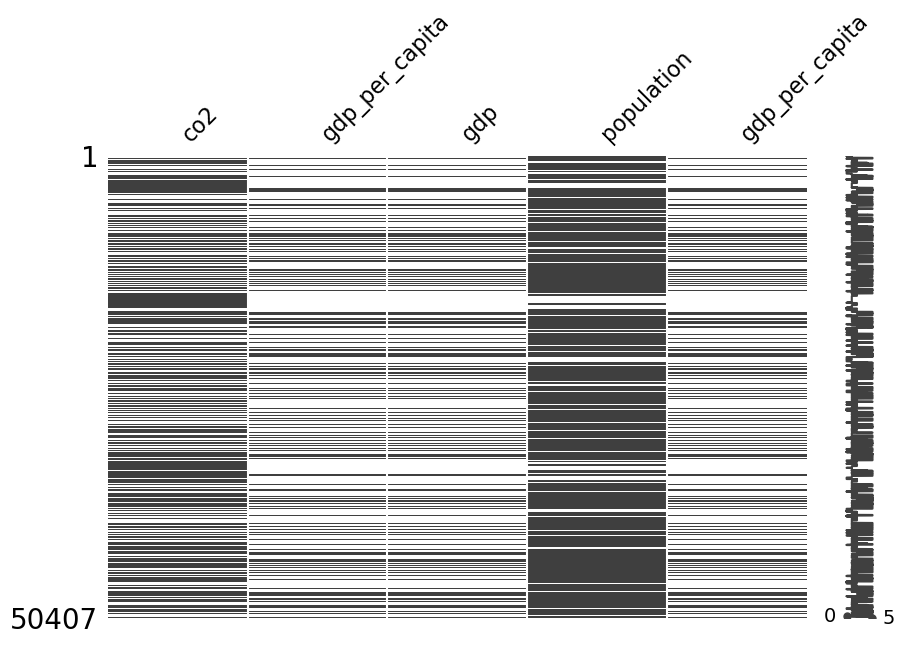

In [14]:
import missingno as msno
cols = ['co2','gdp_per_capita','gdp','population','gdp_per_capita']
subset = co2[cols]   # now safe
msno.matrix(subset, figsize=(10,6));

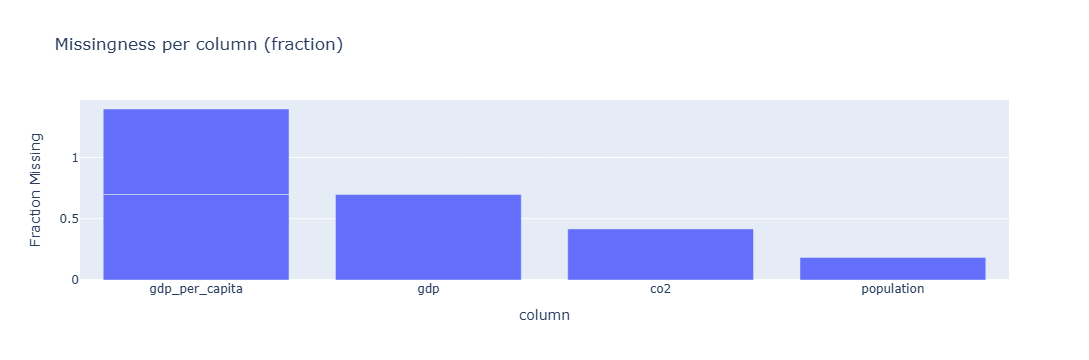

In [15]:
import plotly.express as px

missing = co2[cols].isna().mean().reset_index()
missing.columns = ['column','missing_fraction']

fig = px.bar(missing.sort_values('missing_fraction', ascending=False),
             x='column', y='missing_fraction',
             title='Missingness per column (fraction)',
             labels={'missing_fraction':'Fraction Missing'})
fig.show()

**Graphs vs. Tables** 
Use Graphs when:
- The main goal is insight, not precision.
- You want to show trends over time, relationships, or comparisons.
- The audience needs to see patterns quickly.
**Example:**
- Line chart: CO₂ per capita over time for France, Germany, India → reveals downward trend in Germany vs. upward in India.
- Bar chart: Top 10 emitters → instantly highlights China, USA dominance.
**Use Tables when:**
- The audience needs exact values.
- You are working with small sets of numbers that must be compared precisely.
- Data is for reference, not storytelling.
**Example:**
- A table showing the Top 5 CO₂ emitters in 2020 with emissions in million tonnes (e.g., China ≈ 10,668 Mt, USA ≈ 4,713 Mt).
- Here the precision matters, not just the ranking.
**Static vs. Dynamic Visualizations**
Use Static graphs when:
- Communicating in printed reports, PDFs, academic papers.
- The story is clear and self-contained.
- Simplicity matters (line chart in a newspaper article).
**Example:**
- A static line chart showing India’s CO₂ per capita trend since 1990 with an annotation at its peak.
**Use Dynamic (interactive) graphs when:**
- Data is large, multidimensional, or audience wants to explore.
- Good for dashboards, exploratory analysis, teaching, and presentations.
- You want hover details, zoom, filters.
**Example:**
- Plotly scatter: GDP per capita vs. CO₂ per capita (2020).
- Users can hover over countries, zoom into Africa, or filter by regions.
- Gapminder-style bubble chart: Animated across years, showing how life expectancy and CO₂ evolve. 

## Lets ask some questions and generate figures for these questions
1. *How have CO₂ emissions per capita evolved for 3 countries of your choice since 1990?*
2. *Which top 10 countries contributed most to total CO₂ in the most recent year?*
3. *Is there a relationship between GDP per capita and CO₂ per capita?*
4. *(Gapminder)* How does life expectancy relate to GDP per capita, and how has this changed over time?

## How have CO₂ emissions per capita evolved for 3 countries of your choice since 1990?

In [16]:
import matplotlib.pyplot as plt

# Make sure gdp_per_capita exists (if not, create it earlier)
if 'gdp_per_capita' not in co2.columns:
    co2['gdp_per_capita'] = co2['gdp'] / co2['population']

# Subset: CO₂ per capita since 1990
countries = ['France','Germany','India']
subset = co2[co2['country'].isin(countries) & (co2['year'] >= 1990)]

## Plotting with Matplotlib (static)
Produce the following:
- Line chart (trend over time)
- Bar chart (ranking / top-N)
- Histogram (distribution)
- Scatter (relationship)
- Box/violin (distribution across groups)

## Line chart — Trend over time
## CO₂ per capita from 1990–2020 for 3 countries

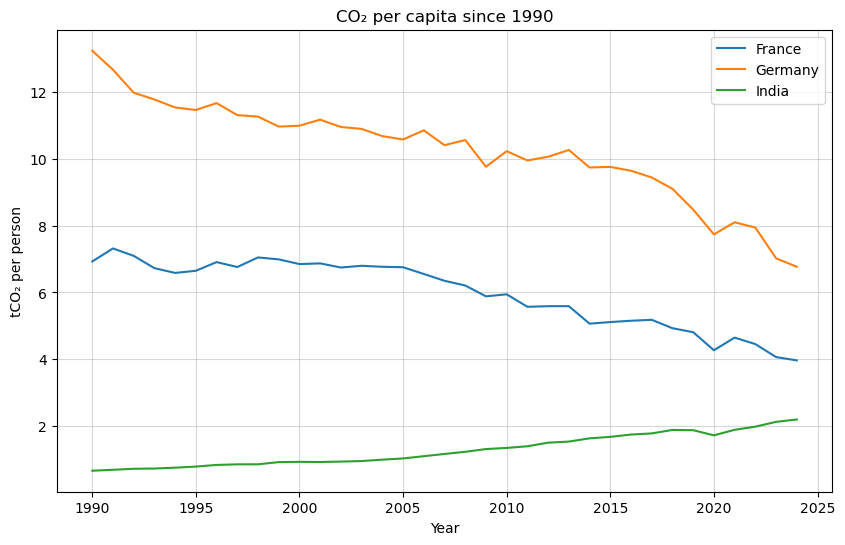

In [17]:
plt.figure(figsize=(10,6))
countries = ['France','Germany','India']
subset = co2[co2['country'].isin(countries) & (co2['year'] >= 1990)]

for c in countries:
    tmp = subset[subset['country']==c]
    plt.plot(tmp['year'], tmp['co2_per_capita'], label=c)

plt.title("CO₂ per capita since 1990")
plt.xlabel("Year"); plt.ylabel("tCO₂ per person")
plt.legend(); plt.grid(True, alpha=0.5)
plt.show()

# Bar chart — Ranking (Top-N)
# Top 10 CO₂ emitters (total CO₂) in the most recent year

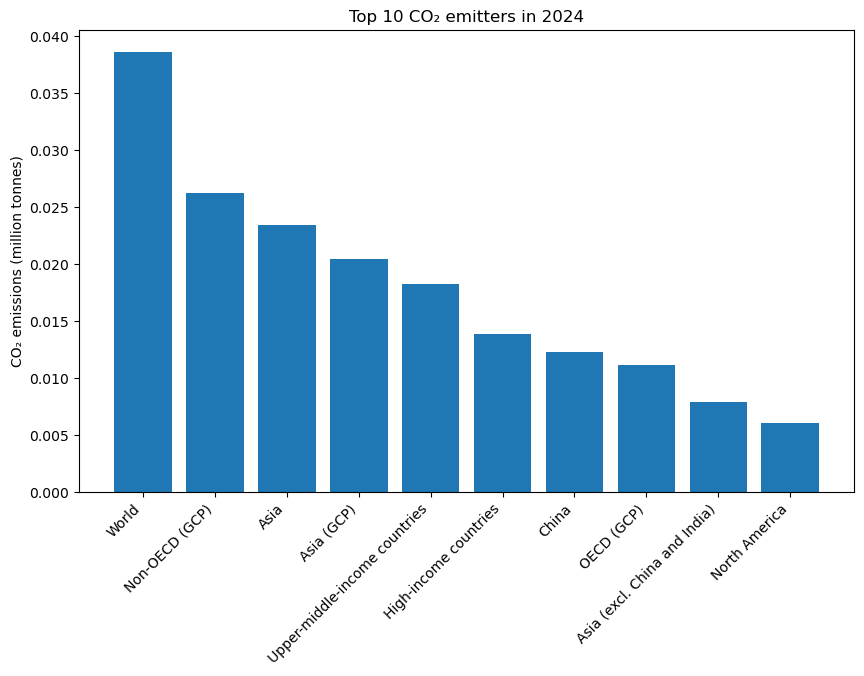

In [18]:
plt.figure(figsize=(10,6))
latest_year = co2['year'].max()
top = (co2[co2['year']==latest_year]
       .sort_values('co2', ascending=False)
       .head(10))

plt.bar(top['country'], top['co2']/1e6)  # convert to million tonnes
plt.title(f"Top 10 CO₂ emitters in {latest_year}")
plt.ylabel("CO₂ emissions (million tonnes)")
plt.xticks(rotation=45, ha='right')
plt.show()

# Histogram — Distribution
# Distribution of per capita CO₂ emissions across all countries in 2020

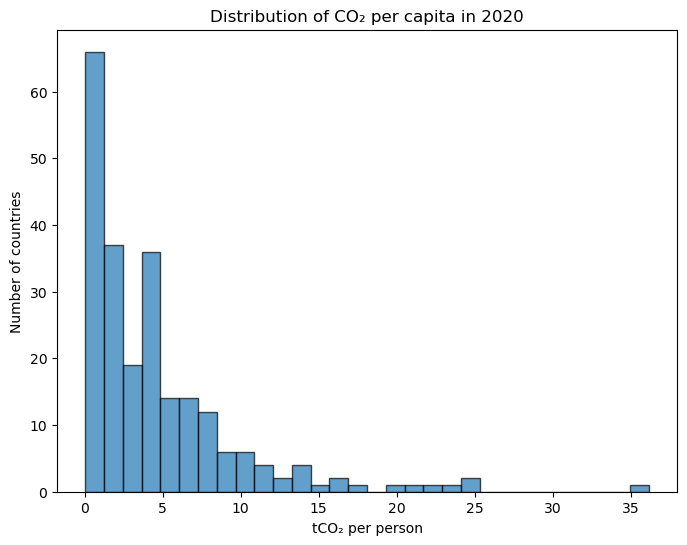

In [19]:
plt.figure(figsize=(8,6))
year = 2020
data = co2[(co2['year']==year) & (co2['co2_per_capita'].notna())]['co2_per_capita']

plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
plt.title(f"Distribution of CO₂ per capita in {year}")
plt.xlabel("tCO₂ per person"); plt.ylabel("Number of countries")
plt.show()

# Scatter — Relationship
# GDP per capita vs CO₂ per capita for countries in 2020

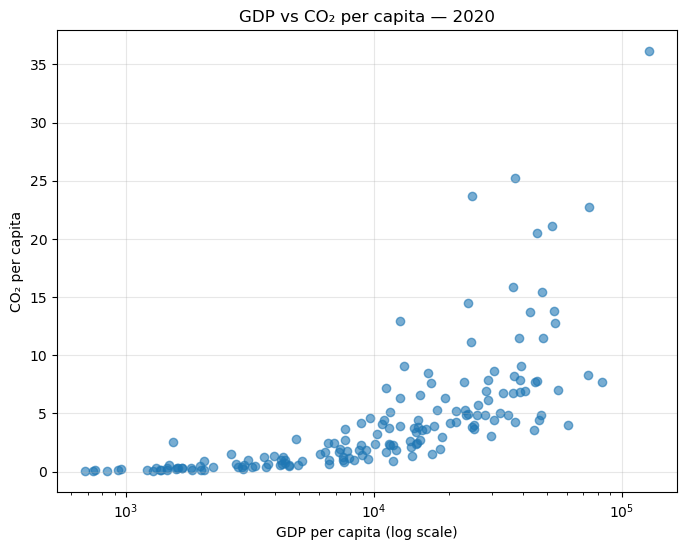

In [20]:
plt.figure(figsize=(8,6))
latest = co2[co2['year']==year].dropna(subset=['gdp','population','co2_per_capita'])
latest['gdp_per_capita'] = latest['gdp'] / latest['population']

plt.scatter(latest['gdp_per_capita'], latest['co2_per_capita'], alpha=0.6)
plt.xscale('log')   # better scale for GDP
plt.xlabel("GDP per capita (log scale)")
plt.ylabel("CO₂ per capita")
plt.title(f"GDP vs CO₂ per capita — {year}")
plt.grid(True, alpha=0.3)
plt.show()

# Boxplot — Distribution across groups
# CO₂ per capita distribution by continent in 2020

In [21]:
pip install pycountry pycountry-convert

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://pypi.tuna.tsinghua.edu.cn/simple/
     ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
     - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
     --- ------------------------------------ 0.5/6.3 MB 932.9 kB/s eta 0:00:07
     --- ------------------------------------ 0.5/6.3 MB 932.9 kB/s eta 0:00:07
     ------ --------------------------------- 1.0/6.3 MB 1.1 MB/s eta 0:00:05
     -------- ------------------------------- 1.3/6.3 MB 1.2 MB/s eta 0:00:05
     --------- ------------------------------ 1.6/6.3 MB 1.2 MB/s eta 0:00:04
     ----------- ---------------------------- 1.8/6.3 MB 1.3 MB/s eta 0:00:04
     -------------- ------------------------- 2.4/6.3 MB 1.4 MB/s eta 0:00:03
     -------------- ------------------------- 2.4/6.3 M

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [22]:
import pycountry
import pycountry_convert as pc

def get_continent(country_name):
    try:
        country = pycountry.countries.lookup(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country.alpha_2)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return None

# Create a continent column
co2['continent'] = co2['country'].apply(get_continent)

<Figure size 1000x600 with 0 Axes>

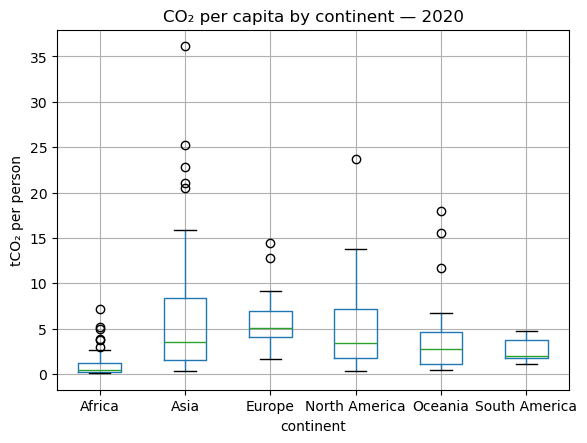

In [23]:
year = 2020
subset_box = co2[(co2['year']==year) & (co2['continent'].notna())]

plt.figure(figsize=(10,6))
subset_box.boxplot(column='co2_per_capita', by='continent')
plt.title(f"CO₂ per capita by continent — {year}")
plt.suptitle("")   # remove default pandas super-title
plt.ylabel("tCO₂ per person")
plt.show();

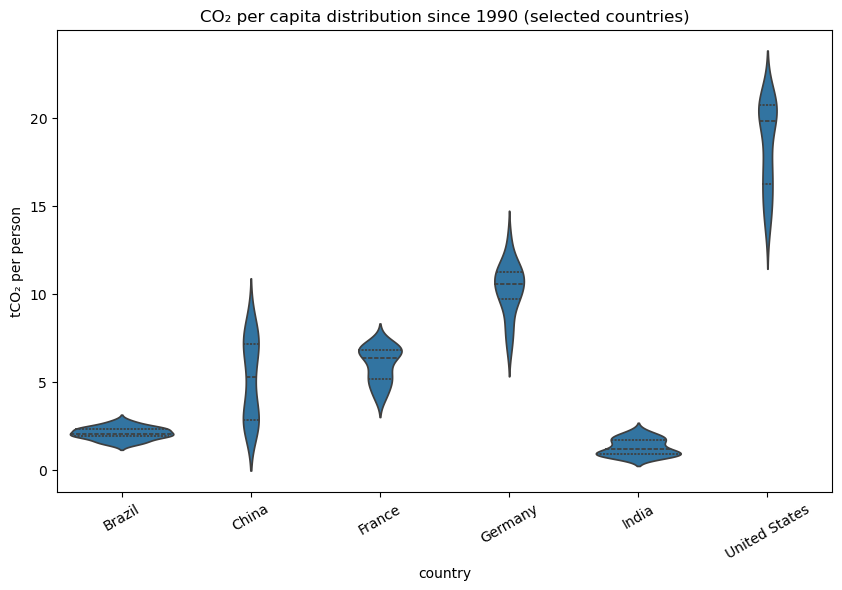

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
countries = ['France','Germany','India','United States','China','Brazil']
subset_countries = co2[(co2['country'].isin(countries)) & (co2['year']>=1990)]
plt.figure(figsize=(10,6))
sns.violinplot(data=subset_countries, x='country', y='co2_per_capita', inner='quartile')
plt.title("CO₂ per capita distribution since 1990 (selected countries)")
plt.ylabel("tCO₂ per person")
plt.xticks(rotation=30)
plt.show()

## Plotting with Plotly Express (interactive)
Recreate charts interactively, add hover info, and enable selection.

In [25]:
import pandas as pd
import plotly.express as px

# Safety: compute gdp_per_capita if it’s not present
if 'gdp_per_capita' not in co2.columns and {'gdp','population'}.issubset(co2.columns):
    co2['gdp_per_capita'] = co2['gdp'] / co2['population']

latest_year = int(co2['year'].max())

# Interactive line (range slider + country selector)

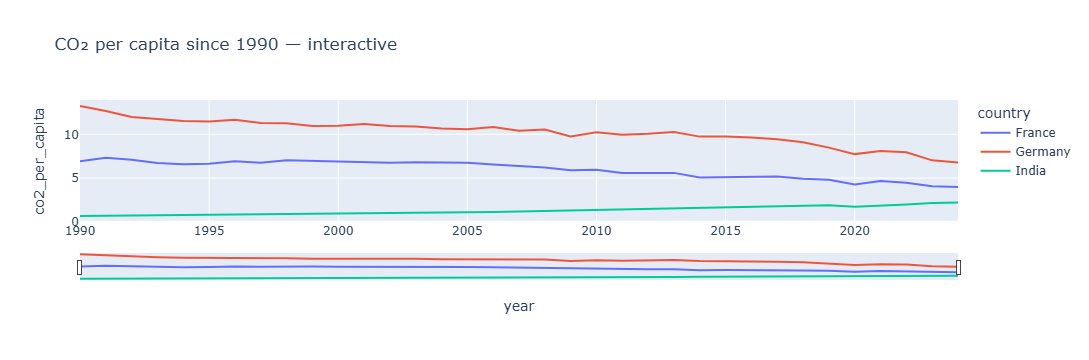

In [26]:
countries = ['France','Germany','India']  # change as you like
line_df = co2[(co2['country'].isin(countries)) & (co2['year']>=1990)]

fig = px.line(line_df, x='year', y='co2_per_capita', color='country',
              title='CO₂ per capita since 1990 — interactive')
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
fig.show()

# Top-N bar with a year slider

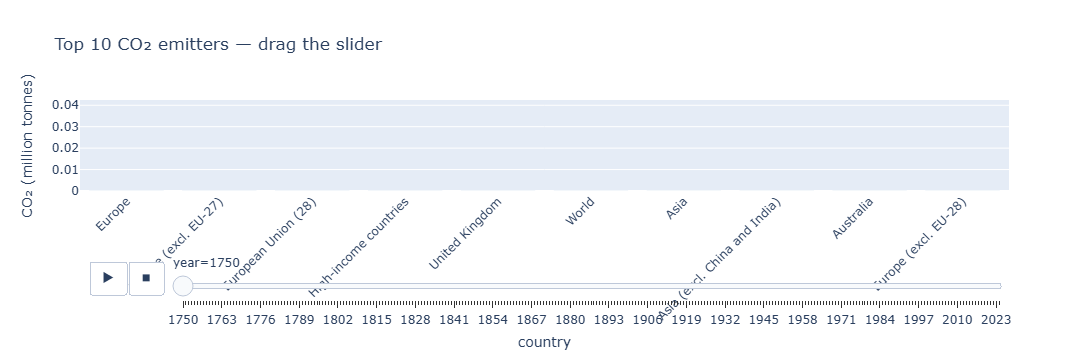

In [27]:
years = sorted(co2['year'].dropna().unique())
def topn_for_year(y, n=10):
    t = (co2[co2['year']==y][['country','co2']]
         .dropna()
         .sort_values('co2', ascending=False)
         .head(n))
    t['co2_million_t'] = t['co2']/1e6
    return t

frames = []
for y in years:
    t = topn_for_year(y)
    f = px.bar(t, x='country', y='co2_million_t', title=f'Top 10 CO₂ emitters — {y}',
               labels={'co2_million_t':'CO₂ (million tonnes)'})
    frames.append(f.data)

# Build a single figure with slider using px.bar animation_frame:
bar_anim_df = (co2
    .loc[co2['year'].isin(years), ['country','year','co2']]
    .dropna()
    .sort_values(['year','co2'], ascending=[True,False])
    .groupby('year', group_keys=False)
    .head(10))
bar_anim_df['co2_million_t'] = bar_anim_df['co2']/1e6

fig = px.bar(bar_anim_df, x='country', y='co2_million_t',
             animation_frame='year', range_y=[0, bar_anim_df['co2_million_t'].max()*1.1],
             title='Top 10 CO₂ emitters — drag the slider',
             labels={'co2_million_t':'CO₂ (million tonnes)'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Scatter: GDP per capita vs CO₂ per capita (hover + log scale)

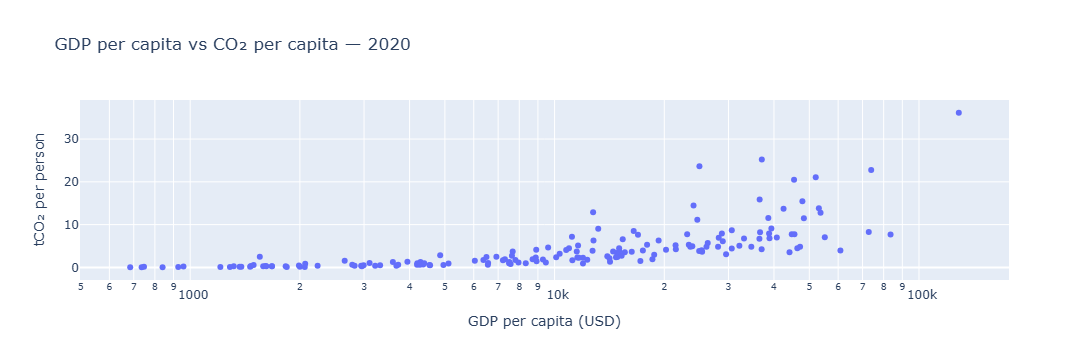

In [28]:
year = 2020  # change as needed
scatter = co2[(co2['year']==year) & co2['co2_per_capita'].notna()]

if 'gdp_per_capita' in scatter.columns:
    fig = px.scatter(scatter, x='gdp_per_capita', y='co2_per_capita',
                     hover_name='country',
                     title=f'GDP per capita vs CO₂ per capita — {year}',
                     labels={'gdp_per_capita':'GDP per capita (USD)',
                             'co2_per_capita':'tCO₂ per person'})
    fig.update_xaxes(type='log')
    fig.show()
else:
    print("gdp_per_capita not available; computed earlier if gdp and population exist.")

# Choropleth world map (per-capita, chosen year)

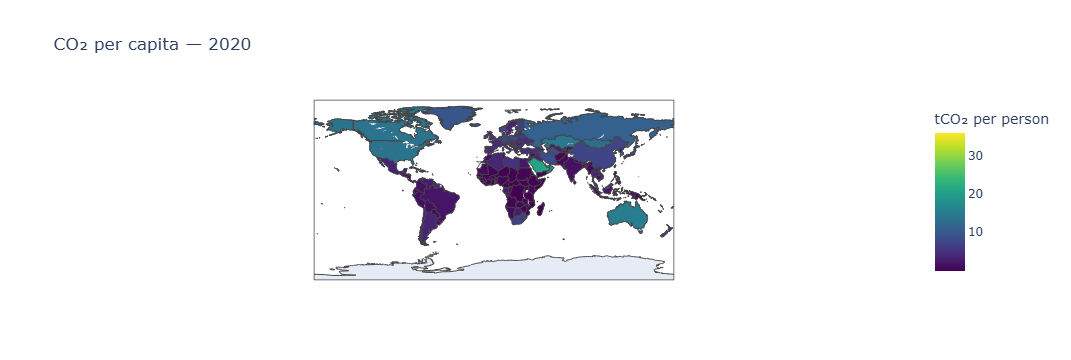

In [29]:
year = 2020
map_df = co2[(co2['year']==year) & co2['co2_per_capita'].notna()]

# OWID dataset typically includes iso_code; if missing, drop this figure or map manually.
if 'iso_code' in map_df.columns:
    fig = px.choropleth(map_df, locations='iso_code', color='co2_per_capita',
                        hover_name='country',
                        color_continuous_scale='Viridis',
                        title=f'CO₂ per capita — {year}',
                        labels={'co2_per_capita':'tCO₂ per person'})
    fig.show()
else:
    print("iso_code not found—cannot draw choropleth without country codes.")

# Interactive violin (selected countries, flexible year range)

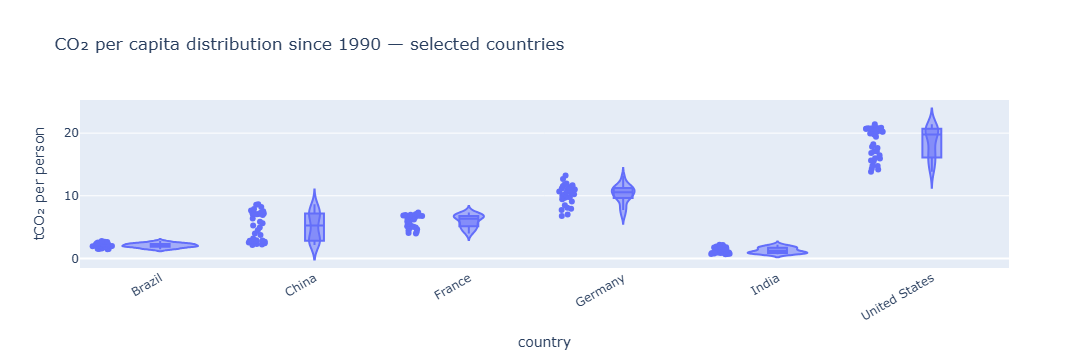

In [30]:
countries = ['France','Germany','India','United States','China','Brazil']
vdf = co2[co2['country'].isin(countries) & (co2['year'].between(1990, latest_year)) & co2['co2_per_capita'].notna()]

fig = px.violin(vdf, x='country', y='co2_per_capita', box=True, points='all',
                title='CO₂ per capita distribution since 1990 — selected countries',
                labels={'co2_per_capita':'tCO₂ per person'})
fig.update_xaxes(tickangle=-30)
fig.show()

# Interactive Table (precise values + sorting in notebook UI)

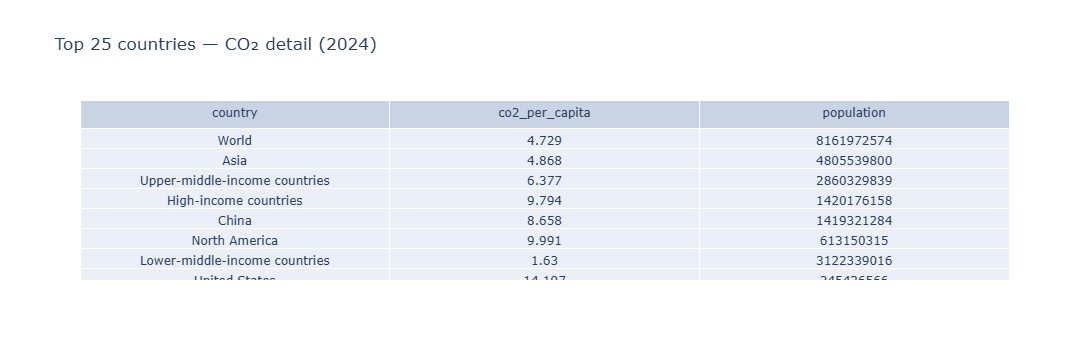

In [31]:
year = latest_year
table_df = (co2[co2['year']==year][['country','co2','co2_per_capita','population']]
            .dropna()
            .sort_values('co2', ascending=False)
            .head(25))
#table_df['co2_million_t'] = (table_df['co2']/1e6).round(1)
#table_df = table_df[['country','co2_million_t','co2_per_capita','population']].reset_index(drop=True)
table_df = table_df[['country','co2_per_capita','population']].reset_index(drop=True)

# In Jupyter, DataFrame display is scrollable/sortable with tools; for a Plotly Table:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(
    header=dict(values=list(table_df.columns)),
    cells=dict(values=[table_df[c] for c in table_df.columns])
)])
fig.update_layout(title=f'Top 25 countries — CO₂ detail ({year})')
fig.show()

# Story telling using data
# Example: “France decline in CO₂ Emissions over time”

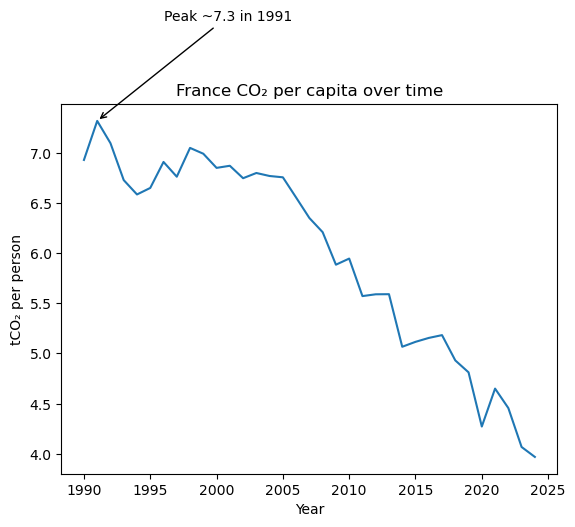

In [33]:
# Matplotlib annotation example (on the line chart)
plt.figure()
c = 'France'
tmp = subset[subset['country']==c].sort_values('year')
plt.plot(tmp['year'], tmp['co2_per_capita'])
plt.title(f'{c} CO₂ per capita over time')
plt.xlabel('Year'); plt.ylabel('tCO₂ per person')
peak_idx = tmp['co2_per_capita'].idxmax()
peak_year = int(tmp.loc[peak_idx, 'year'])
peak_val = float(tmp.loc[peak_idx, 'co2_per_capita'])
plt.annotate(f'Peak ~{peak_val:.1f} in {peak_year}',
             xy=(peak_year, peak_val), xytext=(peak_year+5, peak_val+1),
             arrowprops=dict(arrowstyle='->'))
plt.show()

# Example: “India’s Rising CO₂ Emissions vs. Germany’s Decline”

In [35]:
# We’ll compare India (rapid industrial growth) vs. Germany (energy transition), since 1990.
countries = ['India','Germany']
story_df = co2[co2['country'].isin(countries) & (co2['year']>=1990)]

Text(1995, 15.233, 'Germany’s peak, early 1990s')

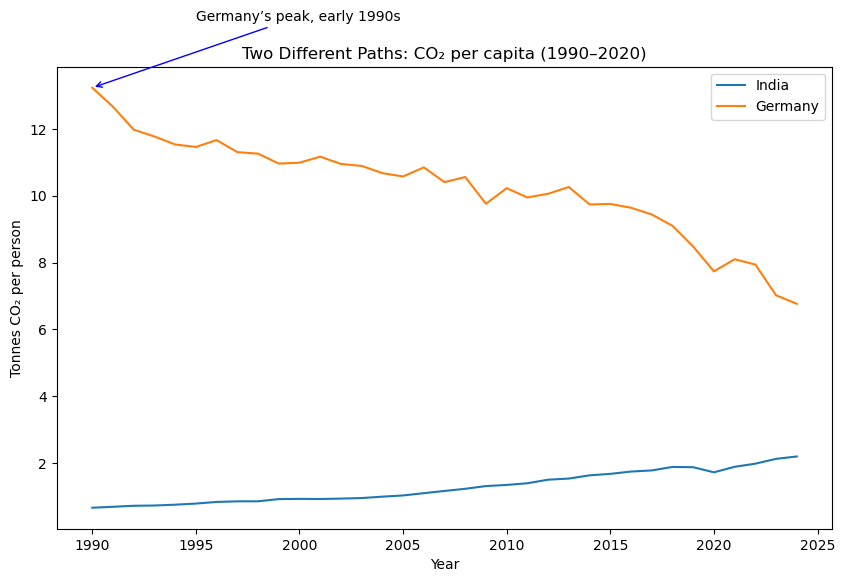

In [36]:
# Create the main plot (static Matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for c in countries:
    tmp = story_df[story_df['country']==c]
    plt.plot(tmp['year'], tmp['co2_per_capita'], label=c)

plt.title("Two Different Paths: CO₂ per capita (1990–2020)")
plt.xlabel("Year"); plt.ylabel("Tonnes CO₂ per person")
plt.legend()

# Annotate Germany’s decline
g_peak = story_df[(story_df['country']=='Germany')]['co2_per_capita'].max()
g_year = story_df[(story_df['country']=='Germany') & (story_df['co2_per_capita']==g_peak)]['year'].values[0]
plt.annotate("Germany’s peak, early 1990s",
             xy=(g_year, g_peak), xytext=(1995, g_peak+2),
             arrowprops=dict(arrowstyle="->", color="blue"))

In the early 1990s, Germany’s CO₂ per capita peaked at around 12 tonnes per person. Since then, through policies on renewable energy, efficiency, and industrial transformation, emissions per person have dropped steadily — now below 8 tonnes per person.

In contrast, India’s per-capita emissions have been rising as the country industrializes and its energy demand grows. While still far below Germany’s level (≈ 2 tonnes per person in 2020), the trajectory is sharply upward.

The contrast tells a powerful story: developed countries reducing emissions while developing economies increase theirs — but with much lower per-capita footprints.

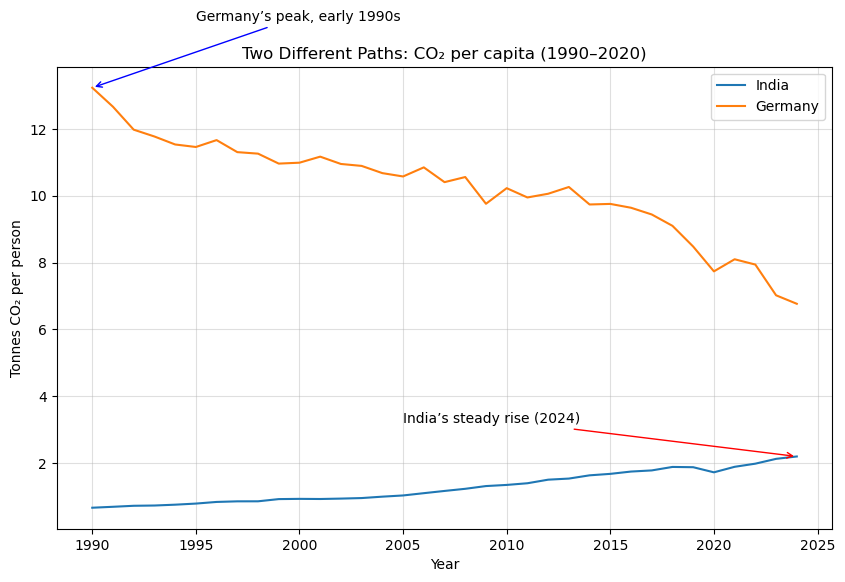

In [38]:
# Create the main plot (static Matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for c in countries:
    tmp = story_df[story_df['country']==c]
    plt.plot(tmp['year'], tmp['co2_per_capita'], label=c)

plt.title("Two Different Paths: CO₂ per capita (1990–2020)")
plt.xlabel("Year"); plt.ylabel("Tonnes CO₂ per person")
plt.legend()

# Annotate Germany’s decline
g_peak = story_df[(story_df['country']=='Germany')]['co2_per_capita'].max()
g_year = story_df[(story_df['country']=='Germany') & (story_df['co2_per_capita']==g_peak)]['year'].values[0]
plt.annotate("Germany’s peak, early 1990s",
             xy=(g_year, g_peak), xytext=(1995, g_peak+2),
             arrowprops=dict(arrowstyle="->", color="blue"))

# Annotate India’s rise
i_latest = story_df[story_df['country']=='India'].iloc[-1]
plt.annotate(f"India’s steady rise ({int(i_latest['year'])})",
             xy=(i_latest['year'], i_latest['co2_per_capita']),
             xytext=(2005, i_latest['co2_per_capita']+1),
             arrowprops=dict(arrowstyle="->", color="red"))

plt.grid(alpha=0.4)
plt.show()

# Dynamic version (Plotly)

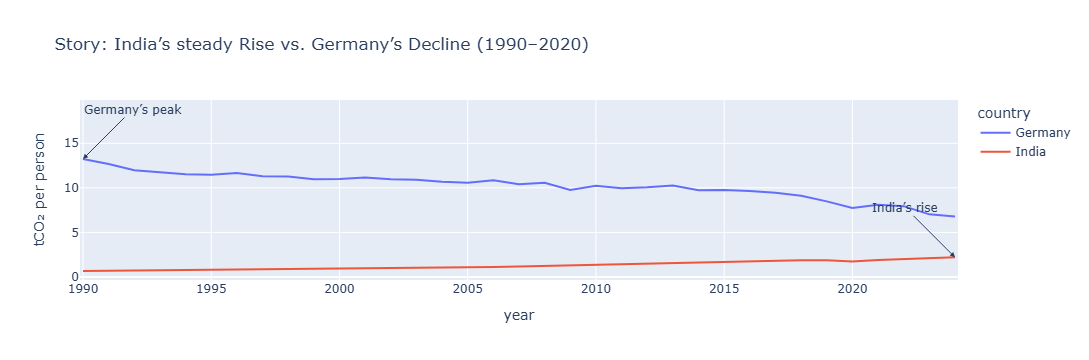

In [39]:
import plotly.express as px

fig = px.line(story_df, x='year', y='co2_per_capita', color='country',
              title="Story: India’s steady Rise vs. Germany’s Decline (1990–2020)",
              labels={'co2_per_capita':'tCO₂ per person'})
fig.add_annotation(x=g_year, y=g_peak,
                   text="Germany’s peak",
                   showarrow=True, arrowhead=2, ax=50, ay=-50)
fig.add_annotation(x=int(i_latest['year']), y=i_latest['co2_per_capita'],
                   text="India’s rise",
                   showarrow=True, arrowhead=2, ax=-50, ay=-50)
fig.show()

# Gapminder — Life expectancy vs GDP

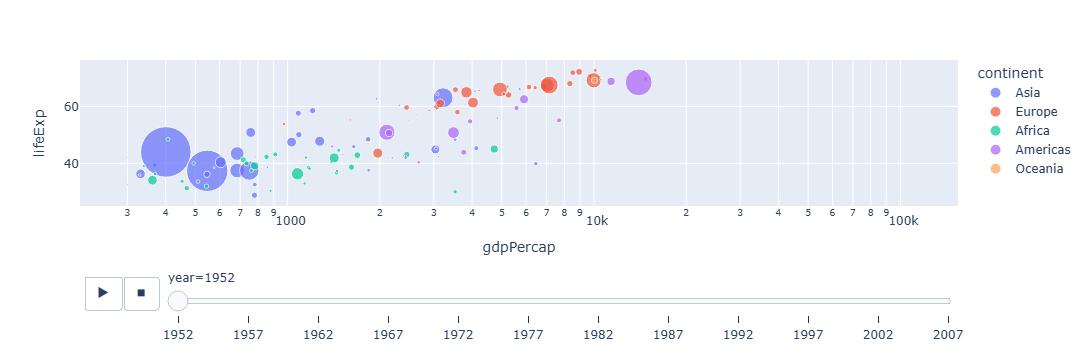

In [40]:
fig = px.scatter(gap, x='gdpPercap', y='lifeExp', animation_frame='year',
                 size='pop', color='continent', hover_name='country',
                 log_x=True, size_max=55)
fig.show()

**Individual Mini-Assignment (1 hours)**

Task: Each student chooses one dataset (can be CO₂, Gapminder, or any public dataset of their interest).

Deliverable:

- At least 6 visualizations (different types: trend, comparison, distribution, relationship).
- One or two table to support precision.
- A short storytelling markdown cell (5–7 sentences) interpreting the figures.

Assessment (10 pts):

- Correctness (3)
- Clarity (3)
- Insight (3)
- Formatting / reproducibility (1)

**assignment start here**

# Berlin Crime Analysis 2012-2019: Key Insights

The comprehensive analysis of Berlin crime data reveals distinct patterns across the city's districts and crime categories over the eight-year period. Central districts like Mitte and Friedrichshain-Kreuzberg consistently show the highest crime concentrations, particularly for theft offenses. The temporal analysis indicates fluctuating crime trends, with certain years experiencing notable peaks in specific crime types.

Correlation analysis demonstrates strong relationships between violent crimes, suggesting interconnected criminal activities. Geographic distribution patterns highlight the urban-rural divide, with inner-city areas facing significantly higher crime rates compared to suburban districts. The interactive visualizations further illuminate how crime dynamics evolved differently across top districts, providing valuable insights for targeted policing strategies and resource allocation.

These findings underscore the importance of district-specific crime prevention approaches and highlight areas requiring focused intervention efforts across Berlin.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read data
df = pd.read_csv('Berlin_Crimes_2012-2019.csv')

# Data preprocessing
df = df[~df['Location'].str.contains('nicht zuzuordnen')]  # Remove unassigned areas
district_yearly = df.groupby(['Year', 'District']).sum(numeric_only=True).reset_index()

In [65]:
df.tail(15)

AttributeError: 'DataFrame' object has no attribute 'end'

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104 entries, 0 to 1198
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            1104 non-null   int64 
 1   District        1104 non-null   object
 2   Code            1104 non-null   int64 
 3   Location        1104 non-null   object
 4   Robbery         1104 non-null   int64 
 5   Street_robbery  1104 non-null   int64 
 6   Injury          1104 non-null   int64 
 7   Agg_assault     1104 non-null   int64 
 8   Threat          1104 non-null   int64 
 9   Theft           1104 non-null   int64 
 10  Car             1104 non-null   int64 
 11  From_car        1104 non-null   int64 
 12  Bike            1104 non-null   int64 
 13  Burglary        1104 non-null   int64 
 14  Fire            1104 non-null   int64 
 15  Arson           1104 non-null   int64 
 16  Damage          1104 non-null   int64 
 17  Graffiti        1104 non-null   int64 
 18  Drugs        

In [62]:
df.describe()

,Year,Code,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.00000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,2015.500000,66337.811594,35.471014,19.002717,293.249094,72.654891,97.812500,1567.303442,44.668478,225.06250,209.371377,75.486413,17.010870,6.651268,297.857790,64.603261,103.244565,704.929348
std,2.292326,34754.800482,37.850988,22.442088,245.884151,72.496397,68.677879,1385.231342,28.573245,150.04187,180.833744,56.479152,12.671592,5.198746,202.268971,61.425262,180.705367,535.507536
min,2012.000000,10111.000000,0.000000,0.000000,6.000000,0.000000,3.000000,32.000000,0.000000,7.00000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,11.000000
25%,2013.750000,40101.000000,11.000000,5.000000,123.000000,25.000000,47.000000,687.000000,24.000000,117.00000,83.000000,36.000000,8.000000,3.000000,149.750000,23.000000,20.000000,309.000000
50%,2015.500000,70151.500000,23.000000,11.000000,222.000000,47.500000,79.000000,1166.000000,39.000000,195.00000,154.000000,64.000000,14.000000,5.000000,260.500000,47.500000,42.000000,607.000000
75%,2017.250000,90519.000000,43.000000,23.000000,379.500000,91.000000,128.000000,2111.500000,59.000000,301.25000,300.000000,100.000000,24.000000,9.000000,399.250000,88.000000,90.500000,928.750000
max,2019.000000,123043.000000,242.000000,169.000000,1966.000000,500.000000,420.000000,12479.000000,197.000000,876.00000,1288.000000,446.000000,74.000000,31.000000,1538.000000,530.000000,1949.000000,3813.000000


# Chart 1: Annual Crime Trends (Line Chart)

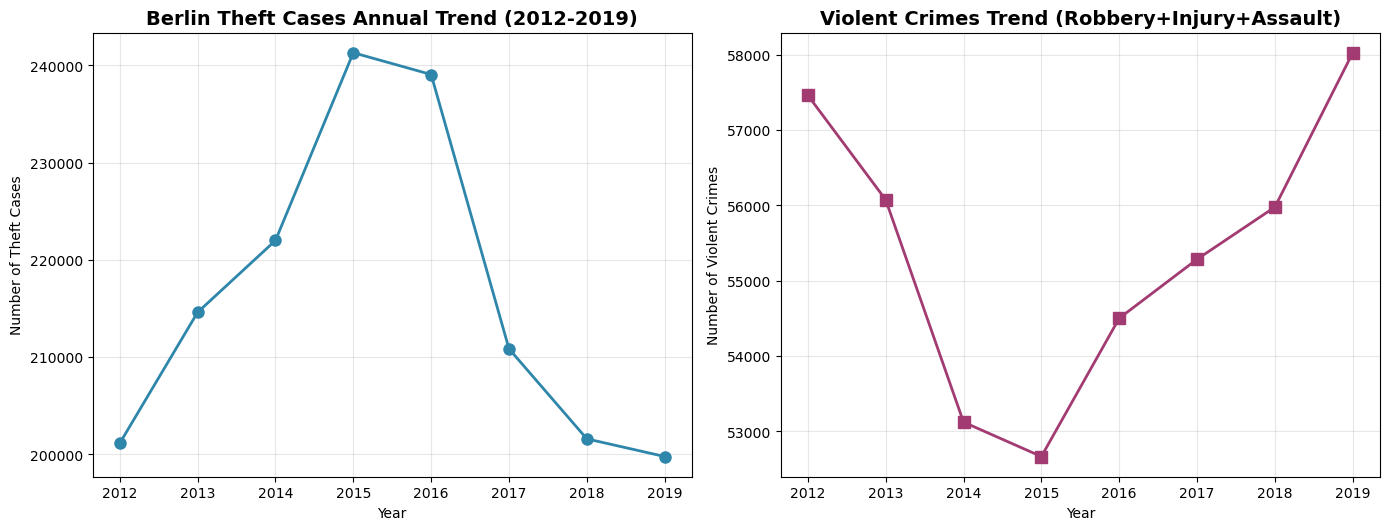

In [45]:
plt.figure(figsize=(14, 10))

# Total thefts by year
plt.subplot(2, 2, 1)
total_thefts = df.groupby('Year')['Theft'].sum()
plt.plot(total_thefts.index, total_thefts.values, marker='o', linewidth=2, markersize=8, color='#2E86AB')
plt.title('Berlin Theft Cases Annual Trend (2012-2019)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Theft Cases')
plt.grid(True, alpha=0.3)

# Violent crimes trend
plt.subplot(2, 2, 2)
violent_crimes = df.groupby('Year')[['Robbery', 'Injury', 'Agg_assault']].sum().sum(axis=1)
plt.plot(violent_crimes.index, violent_crimes.values, marker='s', linewidth=2, markersize=8, color='#A23B72')
plt.title('Violent Crimes Trend (Robbery+Injury+Assault)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crimes')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Chart 2: District Comparison (Bar Chart)

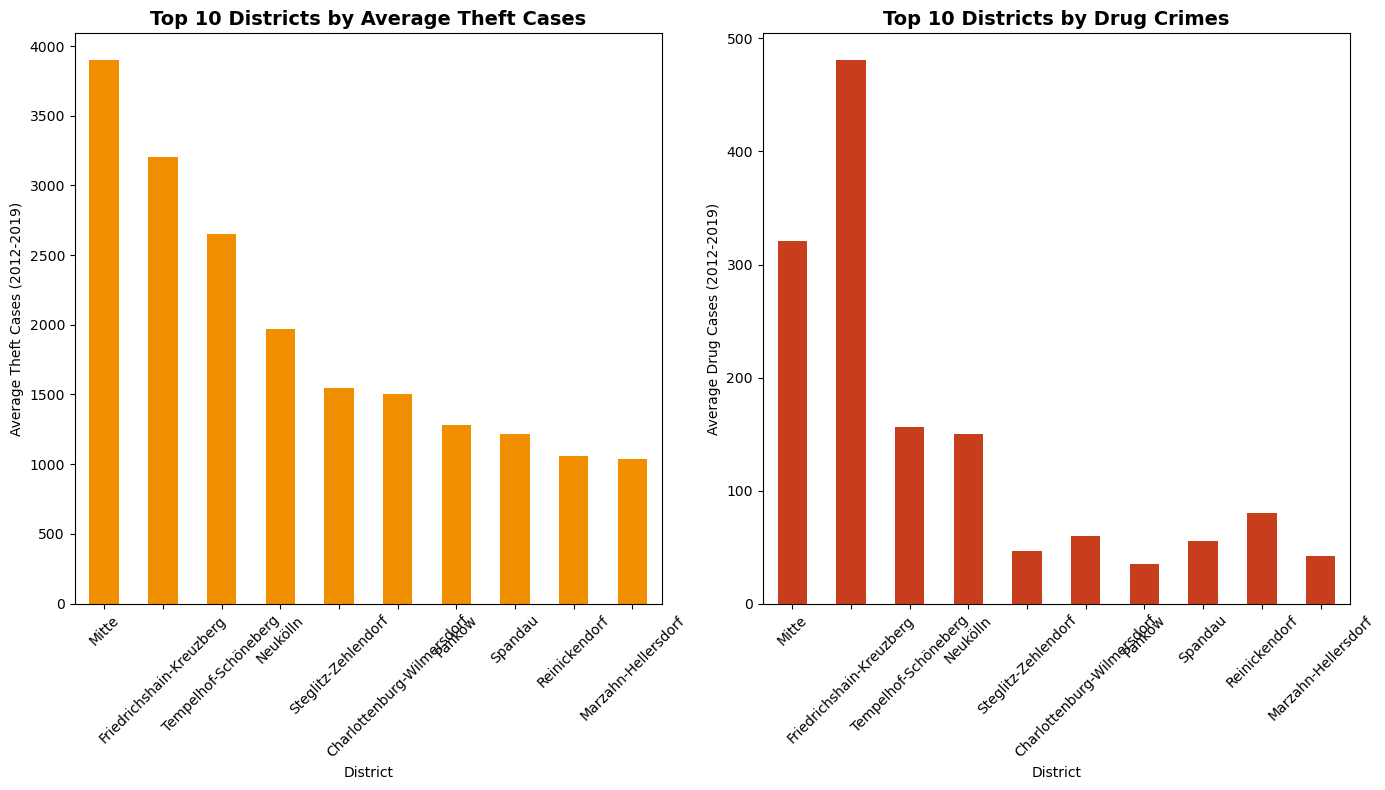

In [46]:
plt.figure(figsize=(14, 8))

# Average crimes per district (2012-2019)
district_avg = df.groupby('District')[['Theft', 'Robbery', 'Drugs']].mean().sort_values('Theft', ascending=False)

plt.subplot(1, 2, 1)
district_avg['Theft'].head(10).plot(kind='bar', color='#F18F01')
plt.title('Top 10 Districts by Average Theft Cases', fontsize=14, fontweight='bold')
plt.xlabel('District')
plt.ylabel('Average Theft Cases (2012-2019)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
district_avg['Drugs'].head(10).plot(kind='bar', color='#C73E1D')
plt.title('Top 10 Districts by Drug Crimes', fontsize=14, fontweight='bold')
plt.xlabel('District')
plt.ylabel('Average Drug Cases (2012-2019)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Chart 3: Crime Type Distribution (Pie Chart)

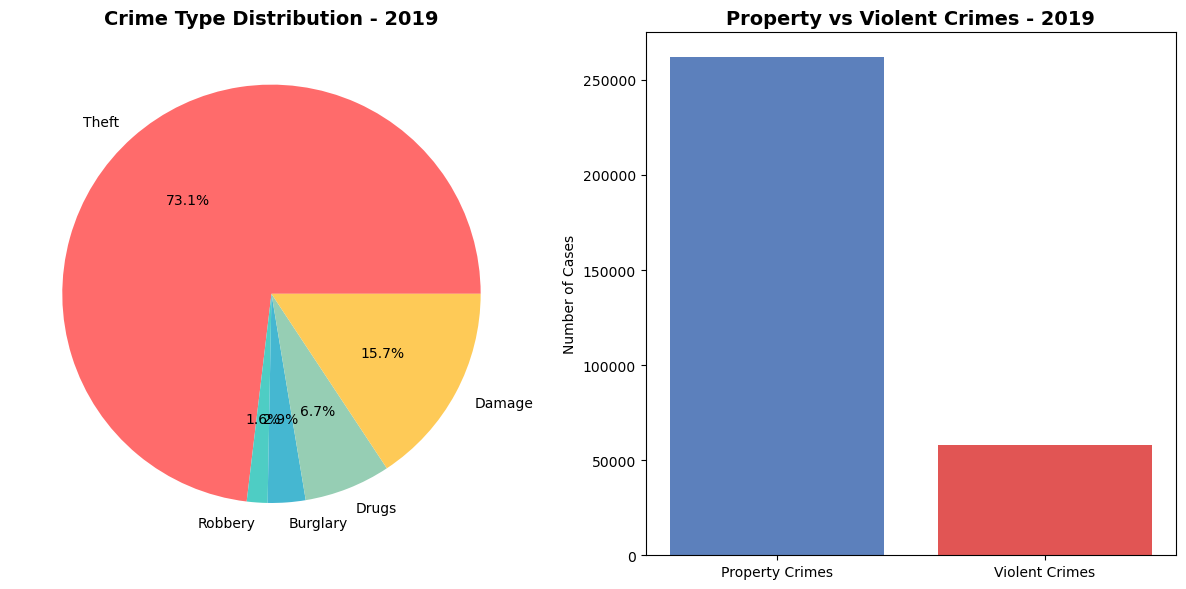

In [47]:
plt.figure(figsize=(12, 6))

# Total crimes by type (2019 only)
crime_types_2019 = df[df['Year'] == 2019][['Theft', 'Robbery', 'Burglary', 'Drugs', 'Damage']].sum()

plt.subplot(1, 2, 1)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
plt.pie(crime_types_2019.values, labels=crime_types_2019.index, autopct='%1.1f%%', colors=colors)
plt.title('Crime Type Distribution - 2019', fontsize=14, fontweight='bold')

# Property vs Violent crimes comparison
plt.subplot(1, 2, 2)
property_crimes = df[df['Year'] == 2019][['Theft', 'Burglary', 'From_car', 'Bike']].sum().sum()
violent_crimes = df[df['Year'] == 2019][['Robbery', 'Injury', 'Agg_assault']].sum().sum()
categories = ['Property Crimes', 'Violent Crimes']
values = [property_crimes, violent_crimes]
plt.bar(categories, values, color=['#5C80BC', '#E15554'])
plt.title('Property vs Violent Crimes - 2019', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cases')

plt.tight_layout()
plt.show()

# Chart 4: Crime Correlation Heatmap (Correlation)

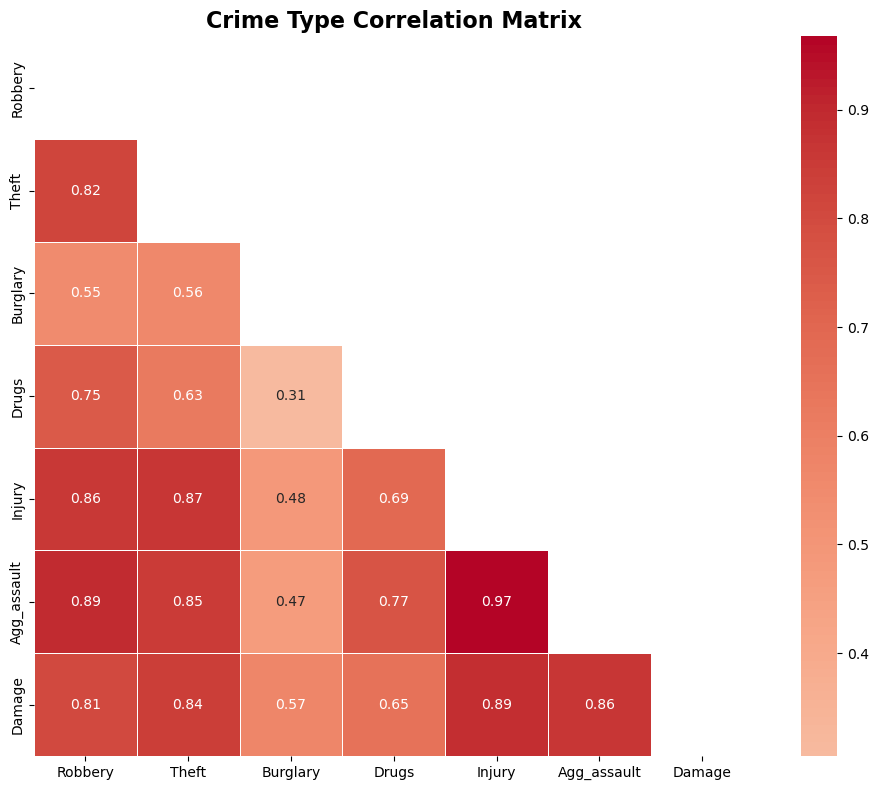

In [48]:
plt.figure(figsize=(10, 8))

# Select main crime types for correlation analysis
crime_columns = ['Robbery', 'Theft', 'Burglary', 'Drugs', 'Injury', 'Agg_assault', 'Damage']
correlation_matrix = df[crime_columns].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=0.5)
plt.title('Crime Type Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Chart 5: Geographic Distribution (Box Plot)

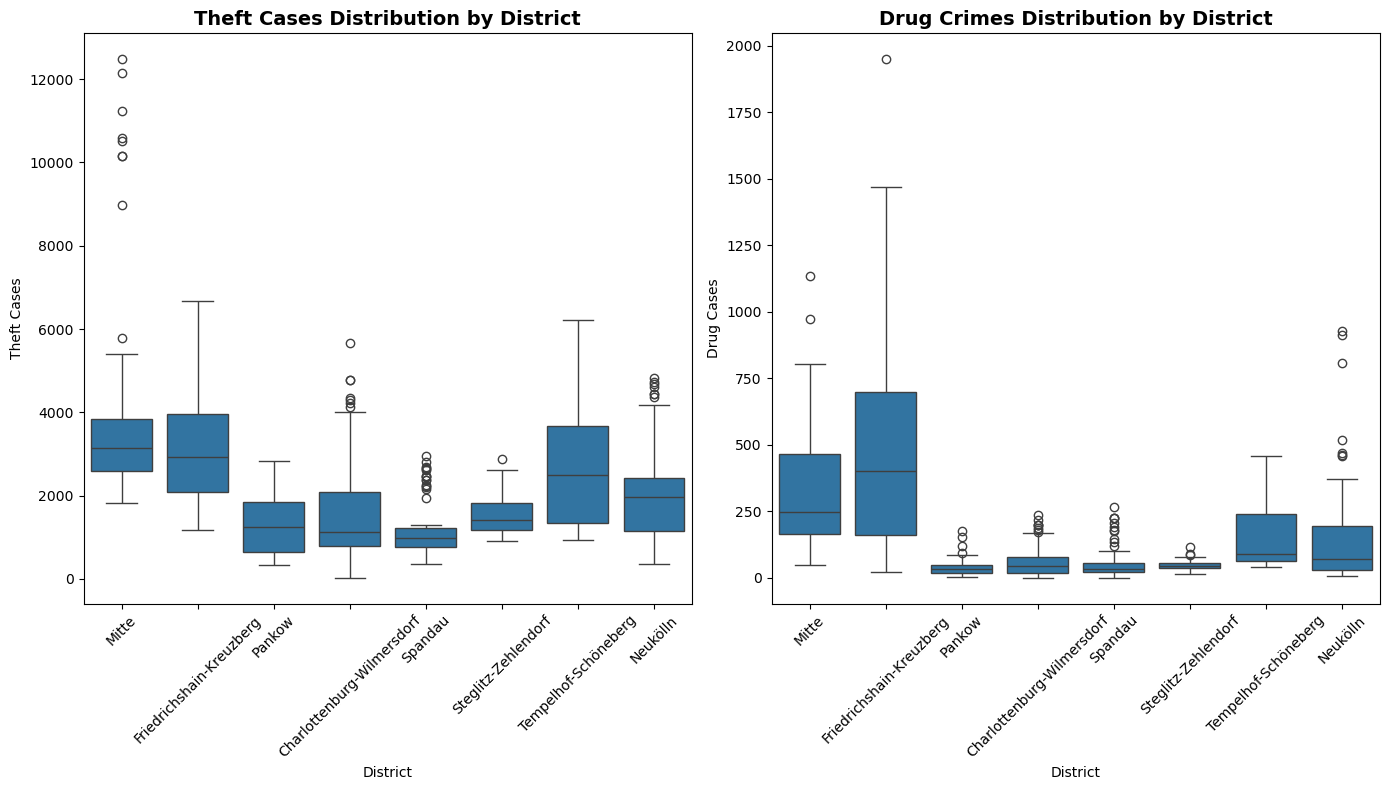

In [49]:
plt.figure(figsize=(14, 8))

# Select top 8 districts for clarity
top_districts = df.groupby('District')['Theft'].mean().nlargest(8).index
filtered_data = df[df['District'].isin(top_districts)]

plt.subplot(1, 2, 1)
sns.boxplot(data=filtered_data, x='District', y='Theft')
plt.title('Theft Cases Distribution by District', fontsize=14, fontweight='bold')
plt.xlabel('District')
plt.ylabel('Theft Cases')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_data, x='District', y='Drugs')
plt.title('Drug Crimes Distribution by District', fontsize=14, fontweight='bold')
plt.xlabel('District')
plt.ylabel('Drug Cases')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Chart 6: Crime Evolution by District (Area Chart)

<Figure size 1400x800 with 0 Axes>

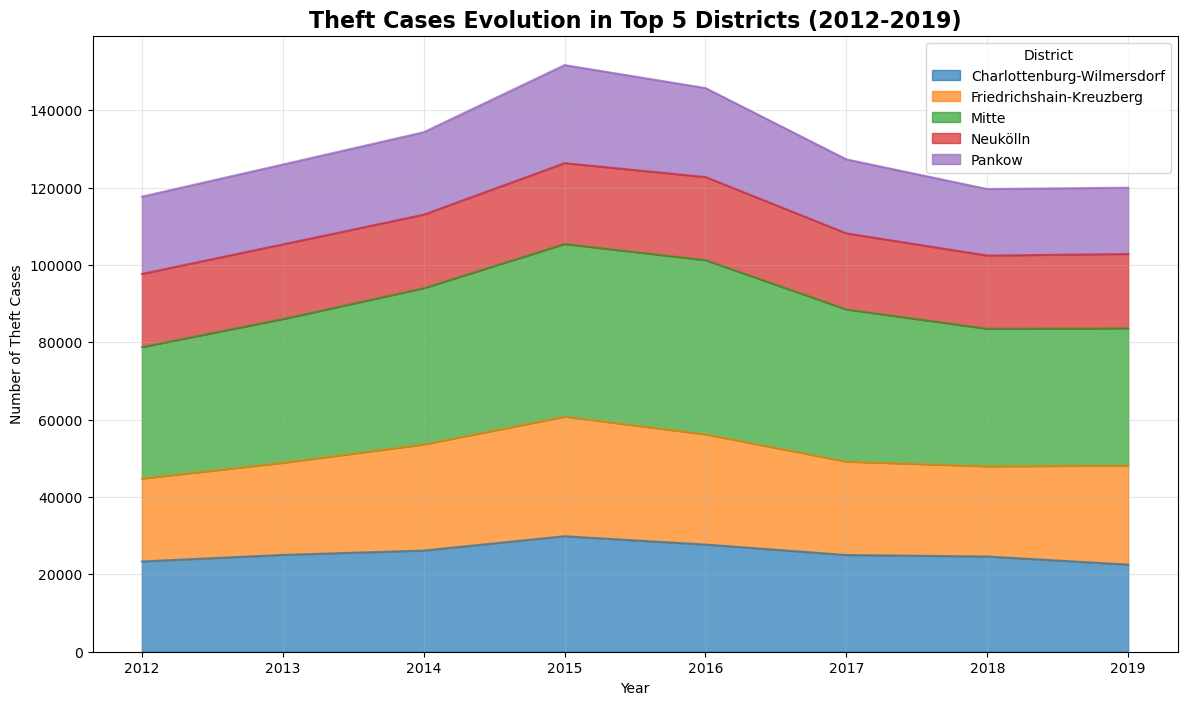

In [50]:
plt.figure(figsize=(14, 8))

# Select top 5 districts for area chart
top_5_districts = district_yearly.groupby('District')['Theft'].mean().nlargest(5).index
pivot_data = district_yearly[district_yearly['District'].isin(top_5_districts)].pivot(
    index='Year', columns='District', values='Theft'
)

pivot_data.plot(kind='area', alpha=0.7, figsize=(14, 8))
plt.title('Theft Cases Evolution in Top 5 Districts (2012-2019)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Theft Cases')
plt.legend(title='District')
plt.grid(True, alpha=0.3)
plt.show()

# Chart 7: Crime Evolution in Top Districts

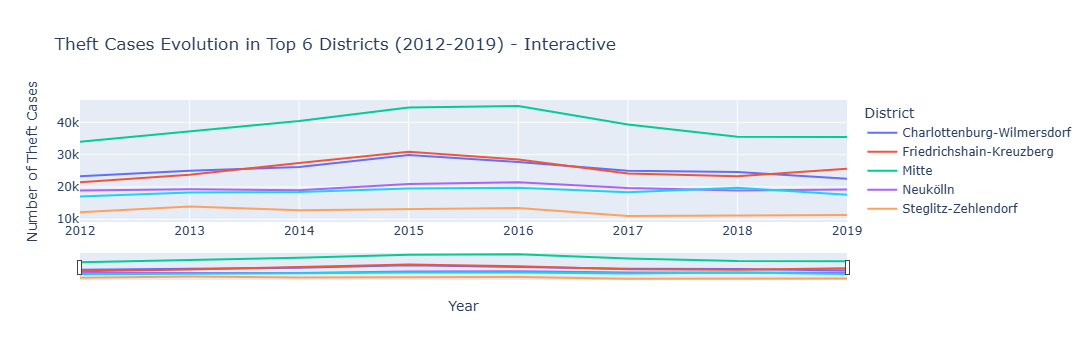

In [55]:
import plotly.express as px

# Prepare data for top 6 districts
top_districts = df.groupby('District')['Theft'].mean().nlargest(6).index
line_data = df[df['District'].isin(top_districts)].groupby(['Year', 'District'])['Theft'].sum().reset_index()

fig = px.line(line_data, x='Year', y='Theft', color='District',
              title='Theft Cases Evolution in Top 6 Districts (2012-2019) - Interactive',
              labels={'Theft': 'Number of Theft Cases', 'Year': 'Year'})
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
fig.show()

# Chart 8: Crime Type Comparison by District (2019)

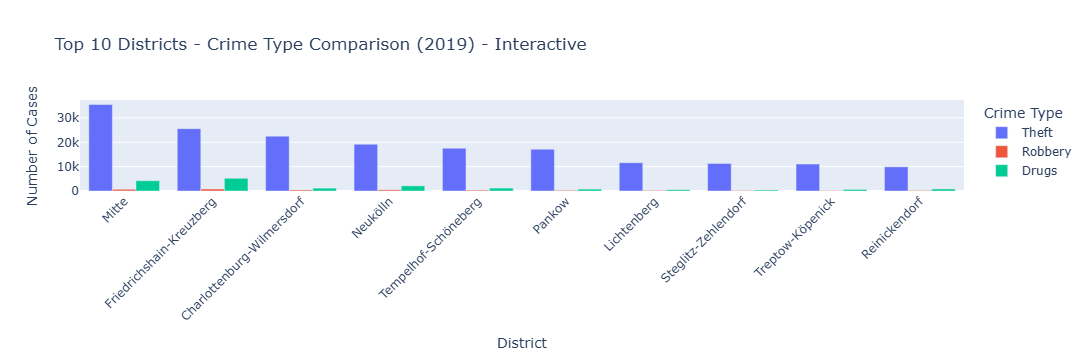

In [56]:
import plotly.express as px

# Prepare data for bar chart
bar_data = df[df['Year'] == 2019].groupby('District')[['Theft', 'Robbery', 'Drugs']].sum().nlargest(10, 'Theft').reset_index()
bar_data_melted = bar_data.melt(id_vars=['District'], value_vars=['Theft', 'Robbery', 'Drugs'],
                              var_name='Crime Type', value_name='Cases')

fig = px.bar(bar_data_melted, x='District', y='Cases', color='Crime Type',
             title='Top 10 Districts - Crime Type Comparison (2019) - Interactive',
             barmode='group',
             labels={'Cases': 'Number of Cases', 'District': 'District'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Table 1: Top 15 Districts by Total Crimes (2019)

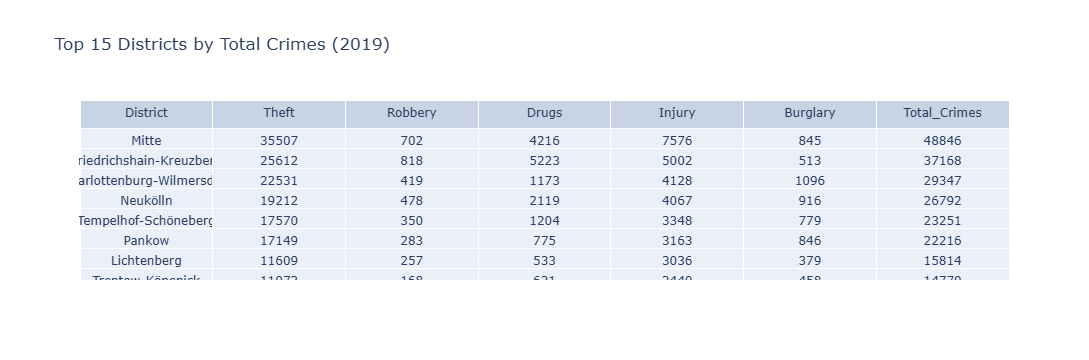

In [57]:
import plotly.graph_objects as go

latest_year = 2019
district_stats_2019 = df[df['Year'] == latest_year].groupby('District').agg({
    'Theft': 'sum',
    'Robbery': 'sum', 
    'Drugs': 'sum',
    'Injury': 'sum',
    'Burglary': 'sum'
}).round(0)

district_stats_2019['Total_Crimes'] = district_stats_2019.sum(axis=1)
table1_df = district_stats_2019.sort_values('Total_Crimes', ascending=False).head(15).reset_index()
table1_df = table1_df[['District', 'Theft', 'Robbery', 'Drugs', 'Injury', 'Burglary', 'Total_Crimes']]

fig1 = go.Figure(data=[go.Table(
    header=dict(values=list(table1_df.columns)),
    cells=dict(values=[table1_df[col] for col in table1_df.columns])
)])
fig1.update_layout(title=f'Top 15 Districts by Total Crimes ({latest_year})')
fig1.show()

# Table 2: Crime Trends by Year (2012-2019)

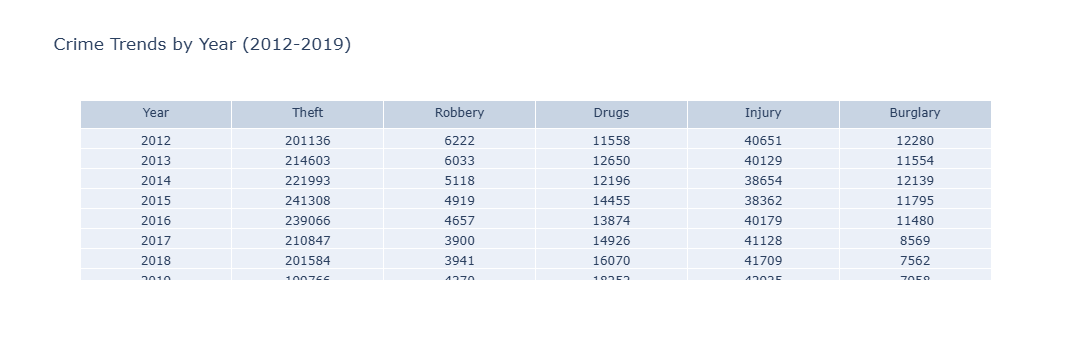

In [59]:
import plotly.graph_objects as go

yearly_totals = df.groupby('Year')[['Theft', 'Robbery', 'Drugs', 'Injury', 'Burglary']].sum().reset_index()
table2_df = yearly_totals.round(0)

fig2 = go.Figure(data=[go.Table(
    header=dict(values=list(table2_df.columns)),
    cells=dict(values=[table2_df[col] for col in table2_df.columns])
)])
fig2.update_layout(title='Crime Trends by Year (2012-2019)')
fig2.show()